<a href="https://colab.research.google.com/github/Bornona/Bornona.github.io/blob/main/Copy_of_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data set link** [Face Mask](https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset)

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.8.2


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 321M/330M [00:04<00:00, 61.4MB/s]
100% 330M/330M [00:04<00:00, 78.2MB/s]


In [ ]:
local_dir='/content/face-mask-12k-images-dataset.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/face-mask-12k-images-dataset.zip' mode='r'>>

In [ ]:
train_dir=os.path.join('/tmp/Face Mask Dataset/Train')
validation_dir=os.path.join('/tmp/Face Mask Dataset/Validation')
test_dir=os.path.join('/tmp/Face Mask Dataset/Test')

Model 1: CNN

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(150,150,3)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(64,(3,2),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(512,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),



                              tf.keras.layers.Dropout(0.5),


                               keras.layers.Flatten(),
                               keras.layers.Dense(units=512,activation=tf.nn.relu),

                               keras.layers.Dense(units=256,activation=tf.nn.relu),

                               keras.layers.Dense(units=128,activation=tf.nn.relu),

                               keras.layers.Dense(units=64,activation=tf.nn.relu),

                               keras.layers.Dense(units=32,activation=tf.nn.relu),


                               keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 73, 64)        12352     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
test_data_generator=ImageDataGenerator(
     rescale=1./255
)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=200,
                                                    class_mode='binary',
                                                    target_size=(150,150))
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (150,150))
test_generator =test_data_generator.flow_from_directory(test_dir,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (150,150))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_steps=10,
                              verbose=1)

Epoch 1/20
50/50 [==============================] - 79s 1s/step - loss: 0.4949 - accuracy: 0.7536 - val_loss: 0.2598 - val_accuracy: 0.9075
Epoch 2/20
50/50 [==============================] - 61s 1s/step - loss: 0.3205 - accuracy: 0.8723 - val_loss: 0.2036 - val_accuracy: 0.9337
Epoch 3/20
50/50 [==============================] - 61s 1s/step - loss: 0.2816 - accuracy: 0.8922 - val_loss: 0.1792 - val_accuracy: 0.9438
Epoch 4/20
50/50 [==============================] - 62s 1s/step - loss: 0.2586 - accuracy: 0.9012 - val_loss: 0.1622 - val_accuracy: 0.9413
Epoch 5/20
50/50 [==============================] - 61s 1s/step - loss: 0.2374 - accuracy: 0.9080 - val_loss: 0.1343 - val_accuracy: 0.9525
Epoch 6/20
50/50 [==============================] - 62s 1s/step - loss: 0.2264 - accuracy: 0.9114 - val_loss: 0.1207 - val_accuracy: 0.9625
Epoch 7/20
50/50 [==============================] - 61s 1s/step - loss: 0.2086 - accuracy: 0.9211 - val_loss: 0.1509 - val_accuracy: 0.9463
Epoch 8/20
50/50 [==

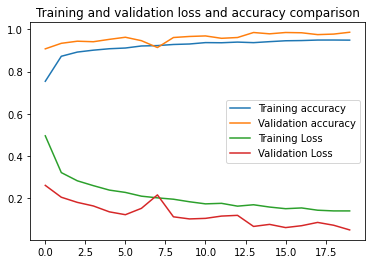

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss and accuracy comparison')
plt.legend()

plt.show()

In [ ]:
scores = model.evaluate(test_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

13/13 [==============================] - 2s 147ms/step - loss: 0.0693 - accuracy: 0.9808
Accuracy: 98.08%


Saving Ema_mask.jpg to Ema_mask.jpg
[0.]
Ema_mask.jpg is With Mask


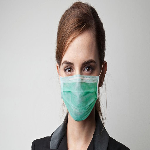

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    temp_path='/content/' + fn
    print(fn + " is Without Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)
  else:
    temp_path='/content/' + fn
    print(fn + " is With Mask")
    img = cv2.imread(temp_path)
    imS=cv2.resize(img, (150, 150))
    cv2_imshow(imS)


In [ ]:
model.save_weights("Facemask.h5")

Model 2: VGG16

In [ ]:
vgg=VGG16()
model2=keras.Sequential()
for layer in vgg.layers[:-1]:
  model2.add(layer)
for layer in model2.layers:
  layer.trainable=False
model2.add(keras.layers.Dense(1,activation='softmax'))
model2.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
test_data_generator=ImageDataGenerator(
     rescale=1./255

)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=200,
                                                    class_mode='binary',
                                                    target_size=(224,224))
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (224,224))
test_generator =test_data_generator.flow_from_directory(test_dir,shuffle = False,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (224,224))

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
history2= model2.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=2,
                              validation_steps=10,
                              verbose=1)

Epoch 1/2
10/10 [==============================] - 31s 3s/step - loss: 0.2234 - accuracy: 0.4945 - val_loss: 0.1755 - val_accuracy: 0.5000
Epoch 2/2
10/10 [==============================] - 32s 3s/step - loss: 0.2121 - accuracy: 0.4900 - val_loss: 0.1857 - val_accuracy: 0.5000


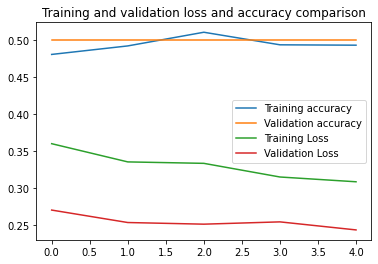

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss and accuracy comparison')
plt.legend()

plt.show()

In [ ]:
scores = model2.evaluate(test_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

13/13 [==============================] - 5s 353ms/step - loss: 0.1570 - accuracy: 0.5131
Accuracy: 51.31%


In [ ]:
from sklearn import metrics
predictions = model.predict_generator(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=0)
predictedClasses = np.where(predictions>0.5, 1, 0)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_generator.classes, predictedClasses)
print(cm)
print('Classification Report')
print(metrics.classification_report(test_generator.classes, predictedClasses))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


13/13 [==============================] - 6s 502ms/step
Confusion Matrix


ValueError: ignored